# 1.) Import the Credit Card Fraud Data From CCLE

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/fraudTest.csv")



In [46]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [6]:
df_select = df[['trans_date_trans_time','category','amt','city_pop','is_fraud']]

In [7]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a unique variable out of trans_date.

In [8]:
df_select['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

<ipython-input-8-344d31e302b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [9]:
df_select['trans_date_trans_time']

0        2020-06-21 12:14:25
1        2020-06-21 12:14:33
2        2020-06-21 12:14:53
3        2020-06-21 12:15:15
4        2020-06-21 12:15:17
                 ...        
555714   2020-12-31 23:59:07
555715   2020-12-31 23:59:09
555716   2020-12-31 23:59:15
555717   2020-12-31 23:59:24
555718   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 555719, dtype: datetime64[ns]

In [10]:
df_select['time_var']=[i.second for i in df_select['trans_date_trans_time']]

<ipython-input-10-dbf22d6c675f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var']=[i.second for i in df_select['trans_date_trans_time']]


In [11]:
df_select

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,25
1,2020-06-21 12:14:33,personal_care,29.84,302,0,33
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,53
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,15
4,2020-06-21 12:15:17,travel,3.19,1126,0,17
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0,7
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0,9
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0,15
555717,2020-12-31 23:59:24,travel,7.99,129,0,24


In [12]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time","is_fraud"], axis = 1)
y = df["is_fraud"]

In [13]:
X.head

<bound method NDFrame.head of            amt  city_pop  time_var  category_entertainment  \
0         2.86    333497        25                       0   
1        29.84       302        33                       0   
2        41.28     34496        53                       0   
3        60.05     54767        15                       0   
4         3.19      1126        17                       0   
...        ...       ...       ...                     ...   
555714   43.77       519         7                       0   
555715  111.84     28739         9                       0   
555716   86.88      3684        15                       0   
555717    7.99       129        24                       0   
555718   38.13    116001        34                       1   

        category_food_dining  category_gas_transport  category_grocery_net  \
0                          0                       0                     0   
1                          0                       0                 

# 4.) Oversample the data (this will be your training data).

In [15]:
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
# Define the oversampler
ros = RandomOverSampler(random_state=0)
# Fit and apply the oversampler
X_resampled, y_resampled = ros.fit_resample(X, y)

# 5.) Train a Logistic regression.

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0) # Create an instance of the logistic regression model
clf = LogisticRegression()
# Fit the model to the training data
model = clf.fit(X_train, y_train) # Make predictions on the test data
y_pred = clf.predict(X_test)
# Evaluate the model using metrics like accuracy, precision, recall, etc
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7848981619473423
Precision: 0.8027421777621528
Recall: 0.7557621712703857


Accuracy:  0.9957082703519758


# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [20]:
from sklearn.metrics import roc_curve

y_proba = clf.predict_proba(X_resampled)[:,1]

fpr, tpr, thresholds = roc_curve(y_resampled, y_proba)

threshold = thresholds[np.argmin(np.abs(fpr - 0.05))] 
threshold

0.6300257415987602

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [24]:
y_pred_proba_or = model.predict_proba(X)[:, 1] 
y_pred_or = (y_pred_proba_or > 0.63).astype(int)

In [26]:
df_select['predictions'] = y_pred_or
df_select_t = df_select[df_select["is_fraud"] == df_select["predictions"]].copy() 
df_select_f = df_select[df_select["is_fraud"] != df_select["predictions"]].copy() 
df_select_t['Profit'] = 0.2 * df_select_t["amt"]
df_select_f['Profit'] = -1 * df_select_f["amt"]
profit = df_select_t['Profit'].sum() + df_select_f['Profit'].sum()
profit

<ipython-input-26-1e87fa93ced8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['predictions'] = y_pred_or


-4511907.457999999

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [28]:
from sklearn.linear_model import LogisticRegression  
clf = LogisticRegression("l1", solver = 'liblinear') 
clf.fit(X, y)
coef = clf.coef_ 
print(coef)


[[ 2.09052958e-03 -4.14627169e-07 -3.97011814e-06 -3.00458052e+00
  -3.03689323e+00 -2.38544046e+00 -2.58883871e+00 -1.27987540e+00
  -3.01231228e+00 -3.12452408e+00 -3.08230935e+00 -1.24259542e+00
  -2.73295226e+00 -2.78006844e+00 -1.19515671e+00 -2.37881844e+00
  -7.82113266e+00]]


In [ ]:
# most of all the variable go to 0 then your data is useless

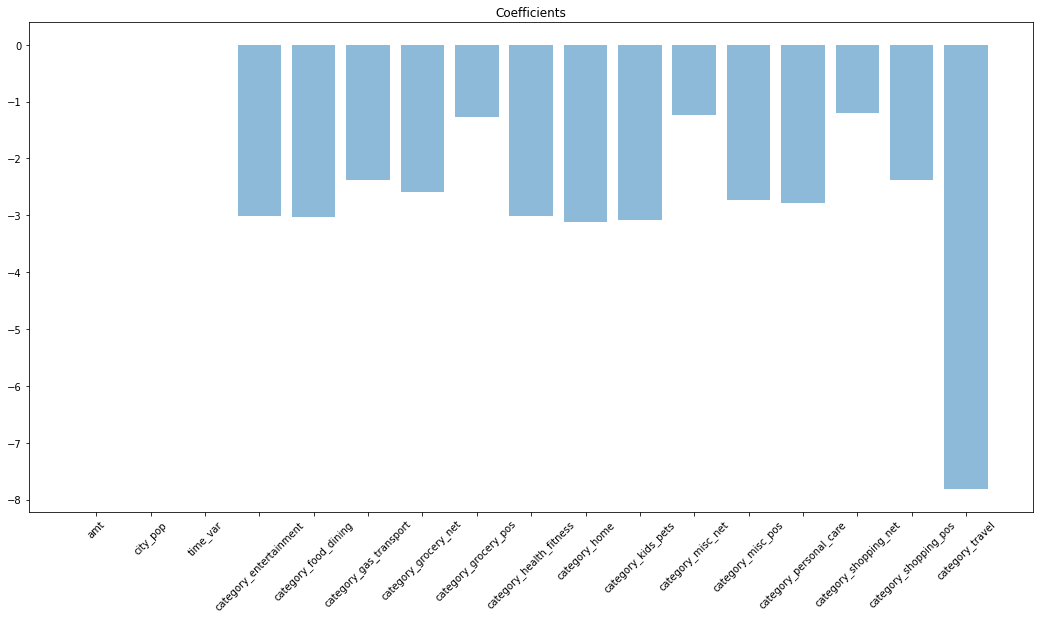

In [31]:
objects = list(X.columns)
plt.figure(figsize = (18, 9))
plt.bar(objects, coef[0], align='center', alpha = 0.5) 
plt.xticks(objects, rotation=45) 
plt.title('Coefficients')
plt.show()

Cefficent:amt,city pop and time_var are 0. As we learned in class, those three variables are not good predictors for the model.